## Australian House Price Prediction using Linear, Ridge and Lasso Regression

#### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

#### Business Goal:
We are required to build a Linear Regression model and use Ridge and Lasso Regression to come up with the final coefficients so that the price of the houses can be predicted. Managment wants to know how exactly the Sale Price varies with the predictor variables. They want to understand the pricing dynamics so that. they can focus on the high yield areas.


#### Analytics Goal:
- Build a Linear regression with ridge and Lasso to get the correct coefficients
- Use that to predict the prices of properties, to decide to invest in them or not
- Which variabes are significant
- How well these variables describe the price of the property?

#### The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

#### Submission Details:

- By: Venki Ramachandran
- Submitted: As part of Graded assignments for M.Sc in AI and ML at IIIT-B
- Dated: 19-APR-2021

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
df = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Data Cleaning Suggestions
A lot of columns have null values. From the above we have:

- MiscFeature
- Fence
- PoolQC
- FirePlaceQu
- Alley

I think dropping them will be good. Maybe decide after the corelation Heat Map analysis

In [4]:
# dropping the above columns
df = df.drop(['MiscFeature', 'Fence','PoolQC','FireplaceQu','Alley'], axis = 1)

In [5]:
# Seperate numerical columns and categorical columns
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

In [6]:
# Find nulls in numerical columns
df[num_vars].isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

In [7]:
# Find nulls in categorical columns
df[cat_vars].isna().sum().sort_values(ascending=False)

GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtQual         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
SaleCondition     0
BldgType          0
Condition2        0
Condition1        0
Neighborhood      0
LandSlope         0
RoofStyle         0
LotConfig         0
Utilities         0
LandContour       0
LotShape          0
Street            0
HouseStyle        0
ExterCond         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
SaleType          0
Foundation        0
Heating           0
HeatingQC         0
CentralAir        0
KitchenQual       0
Functional        0
PavedDrive        0
MSZoning          0
dtype: int64

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

- Replace all the categorical NaN with 'no' since they do not have a garage or basement
- Replace all Null ```GarageYrBuilt``` with the ```YearBuilt``` variable
- Replace the Null ```LotFrontage``` with the mean



In [8]:
# Replace all the columsn values where 'GaragaCond' and 'BsmtExposure' are NaN with 'no'
# since these house have no garage and no basement
null_cat_vars = ['MasVnrType','GarageCond','GarageQual','GarageFinish','GarageType','BsmtFinType2','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1']
df[null_cat_vars] = df[null_cat_vars].fillna(value='no')

In [9]:
# Only 8 and 1 rows have NaN, fix them as well
df[cat_vars].isna().sum().sort_values(ascending=False)

Electrical       1
Condition1       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition2       0
SaleCondition    0
ExterQual        0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
MasVnrType       0
ExterCond        0
SaleType         0
Foundation       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
KitchenQual      0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
MSZoning         0
dtype: int64

In [10]:
# Find nulls in numerical columns
df[num_vars].isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

In [11]:
# Let us replace the null 'LotFrontage' with mean since there may not be a lot front yard
mean_lotfrontage = df['LotFrontage'].mean()
mean_lotfrontage

70.04995836802665

In [12]:
# replace the null LotFrontage with the mean
df[['LotFrontage']] = df[['LotFrontage']].fillna(value=70.04)

In [13]:
# Check again
df[num_vars].isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
MasVnrArea        8
BsmtFinSF1        0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtUnfSF         0
BsmtFinSF2        0
SalePrice         0
BsmtFullBath      0
YearRemodAdd      0
YearBuilt         0
OverallCond       0
OverallQual       0
LotArea           0
LotFrontage       0
MSSubClass        0
GrLivArea         0
BsmtHalfBath      0
YrSold            0
FullBath          0
MoSold            0
MiscVal           0
PoolArea          0
ScreenPorch       0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
GarageArea        0
GarageCars        0
Fireplaces        0
TotRmsAbvGrd      0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
Id                0
dtype: int64

In [14]:
# Replace null 'GarageYrBlt' with the value from 'YearBuilt'
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

In [15]:
# Check again, now it is all good, Proceed to next steps
df[num_vars].isnull().sum().sort_values(ascending=False)

MasVnrArea       8
BsmtFinSF1       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
SalePrice        0
YrSold           0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
MSSubClass       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
Id               0
dtype: int64

In [16]:
# replace the null MasVnrArea with '0'
df[['MasVnrArea']] = df[['MasVnrArea']].fillna(value=0)

In [17]:
# Check categorical values one more time
df[cat_vars].isna().sum().sort_values(ascending=False)

Electrical       1
Condition1       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition2       0
SaleCondition    0
ExterQual        0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
MasVnrType       0
ExterCond        0
SaleType         0
Foundation       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
KitchenQual      0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
MSZoning         0
dtype: int64

In [18]:
#impute electrical
df["Electrical"].fillna(df["Electrical"].mode(), inplace=True)

In [19]:
#impute electrical
df["MasVnrType"].fillna(df["Electrical"].mode(), inplace=True)

In [20]:
# replace the null MasVnrArea with the 0
df[['MasVnrArea']] = df[['MasVnrArea']].fillna(value=0)

In [21]:
# head
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [22]:
# GrdLivArea, all houses less than 5000, only one outlier
bins = [1000, 2000, 5000, 7500, 10000, 12500, 15000]
s = pd.cut(df['GrLivArea'], bins=bins).value_counts()
s

(1000, 2000]      1015
(2000, 5000]       213
(5000, 7500]         1
(12500, 15000]       0
(10000, 12500]       0
(7500, 10000]        0
Name: GrLivArea, dtype: int64

In [23]:
# OverallQual, Quality of the house. 5,6,7 is preferred
df['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [24]:
#GarageCars, atleast one car garage. is preferred but most prefer a 2-car garage
df['GarageCars'].astype('category').value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [25]:
#YearBuilt, most between 1950 and 1975, followed by 2000-2010, and then 1975-2000
bins = [1900, 1925, 1950, 1975, 2000, 2010, 2015, 2020]
s = pd.cut(df['YearBuilt'], bins=bins).value_counts()
s

(1950, 1975]    420
(2000, 2010]    364
(1975, 2000]    338
(1925, 1950]    176
(1900, 1925]    137
(2015, 2020]      0
(2010, 2015]      0
Name: YearBuilt, dtype: int64

In [26]:
# LotArea, Let us bin it to see the most values lot area, Max Sales are where 5000 < area < 12500
bins = [1000, 2000, 5000, 7500, 10000, 12500, 15000]
s = pd.cut(df['LotArea'], bins=bins).value_counts()
s

(7500, 10000]     479
(10000, 12500]    357
(5000, 7500]      216
(12500, 15000]    139
(2000, 5000]      122
(1000, 2000]       25
Name: LotArea, dtype: int64

In [27]:
# MasVnrArea
bins = [10, 20, 50, 75, 100, 125, 150, 200, 300, 400, 500, 600, 700, 800, 900]
s = pd.cut(df['MasVnrArea'], bins=bins).value_counts()
s

(200, 300]    126
(150, 200]     86
(300, 400]     72
(100, 125]     49
(75, 100]      45
(400, 500]     43
(125, 150]     39
(50, 75]       32
(20, 50]       29
(500, 600]     18
(600, 700]     15
(10, 20]       11
(700, 800]     10
(800, 900]      4
Name: MasVnrArea, dtype: int64

In [28]:
# Condition1 and Condition2 
df['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [29]:
# Condition2 
df['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [30]:
# MSSubClass. Most of the sales are of type = 20, 50, 60
df['MSSubClass'].astype('category').value_counts(sort=False)

20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64

In [31]:
#MSZoning:: Identifies the general zoning classification of the sale
# Residential Low Density and Medium Density are sold the most
df['MSZoning'].astype('category').value_counts(sort=False)

C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: MSZoning, dtype: int64

In [32]:
#Street: Type of road access property
# Paved is desired
df['Street'].astype('category').value_counts(sort=False)

Grvl       6
Pave    1454
Name: Street, dtype: int64

In [33]:
#Neighborhood: Physical locations within Ames city limits
# NAmes, OldTown, Edwards, College Creek are top four desirable
df['Neighborhood'].astype('category').value_counts(sort=False)

Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: Neighborhood, dtype: int64

In [34]:
#LotShape: General shape of property
# regular and slightly regular is desired
df['LotShape'].astype('category').value_counts(sort=False)

IR1    484
IR2     41
IR3     10
Reg    925
Name: LotShape, dtype: int64

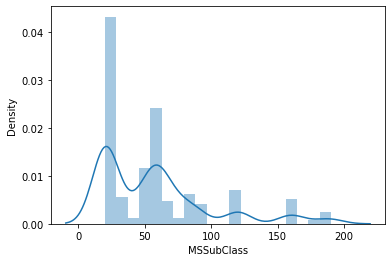

In [35]:
# MSSubClass: Type of dwelling sold
sns.distplot(df['MSSubClass'])
plt.show()

In [36]:
# LandContour: Shape of the land 
df['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [37]:
# SaleType: Type of Sale
df['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [38]:
# SaleCondition: Condition of Sale
df['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

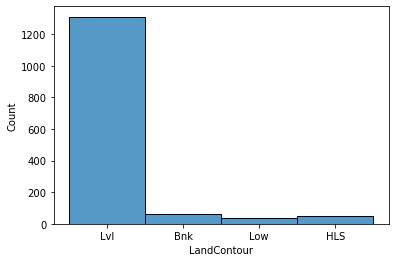

In [39]:
# LandContour: Shape of the land - Most of them prefer the 'Level' shape
sns.histplot(df['LandContour'])
plt.show()

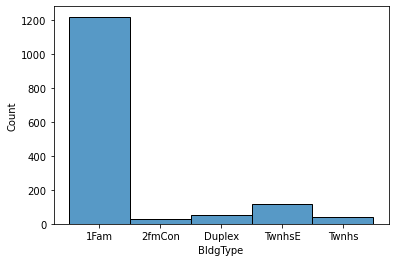

In [40]:
# BldgType: Type of bldg - Most of the Sales are in '1fam - Single Family Homes'
sns.histplot(df['BldgType'])
plt.show()

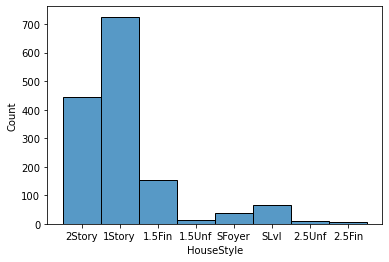

In [41]:
# HouseStyle: Style of dwelling
# 1 Story and 2 Story is preferred
sns.histplot(df['HouseStyle'])
plt.show()

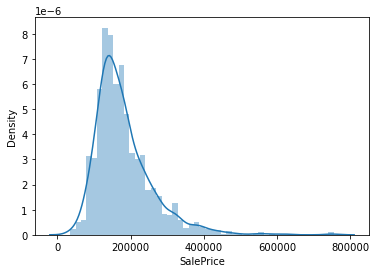

In [42]:
# target variable: price of house
sns.distplot(df['SalePrice'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [43]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


We do not want 'Id' as it serves no purpose in prediction.

In [44]:
# dropping ID 
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [45]:
# correlation matrix
cor = df_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357053,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357053,1.000000,0.306774,0.234202,-0.052825,0.117590,0.082752,0.178697,0.215815,0.043331,...,0.077092,0.137451,0.009795,0.062332,0.037684,0.180867,0.001155,0.010161,0.006765,0.334900
LotArea,-0.139781,0.306774,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234202,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052825,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117590,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082752,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178697,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.215815,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043331,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


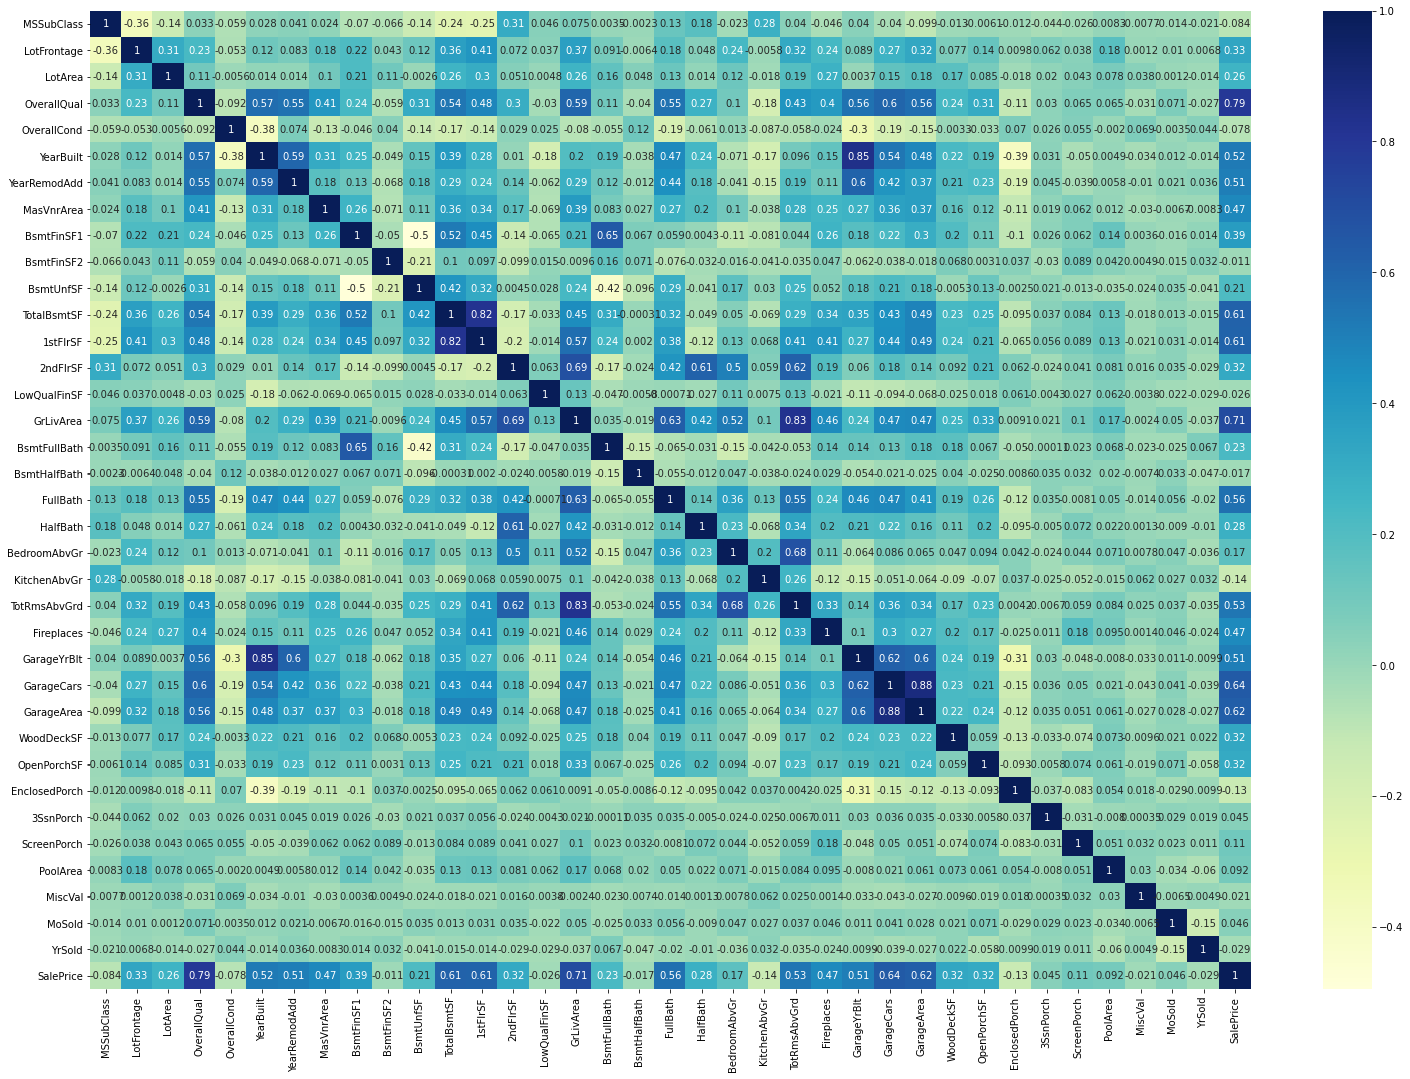

In [46]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(26,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with ```OverallQual, YearBuilt, YearRemodAdd, TotalBsmtDF, 1stFlrSF, GrLivARea, FullBath, TotRmsAbvGrnd, GarageCars, GarageArea```.

- Price is negatively correlated to ```KitchenAbvGrnd``` (-0.14) and ```EnclosedPorch``` (-0.13 approximately). 

Correlation among independent variables:
- Many independent variables are highly correlate: ```(YearBuilt & GarageYrBlt), (TotRmsAbvGrnd & GrlivArea), (TotRmsAbvGrnd & BedroomAbvGrnd)```. are all positively correlated 


Remove multicollinearity (since linear and logistic regression, suffer more from multicollinearity). Hopefully, Lasso Regression will remove these redundant variables

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [47]:
# List the categorical columns that need to be converted to dummy variabls
# 38 columns need dummy variables
just_dummies = pd.get_dummies(data=df, columns=cat_vars, drop_first = True)
just_dummies

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


In [48]:
just_dummies = just_dummies.drop(['Id'], axis=1)
df = just_dummies
df.shape

(1460, 243)

In [49]:
# split into train and test
import sklearn
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size=0.7, random_state=100)

In [50]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_names = train_df.columns
train_df[col_names] = scaler.fit_transform(train_df)
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.035305,0.917208,-0.057261,0.648310,-0.532073,0.715324,0.389207,0.809137,1.159065,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
239,-0.195760,-0.803916,-0.169753,-0.066511,-1.448170,-0.868511,-1.698692,-0.558025,-0.761831,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
986,-0.195760,-0.486867,-0.502762,-0.066511,2.216221,-2.023391,0.874765,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
1416,3.039142,-0.441574,0.082504,-1.496155,0.384025,-2.848305,-1.698692,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
390,-0.195760,-0.894502,-0.202365,-0.781333,2.216221,-2.353356,-1.698692,-0.558025,-0.445625,1.996400,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.035305,-0.305696,-0.222359,0.648310,-0.532073,1.111283,0.971877,-0.558025,0.429856,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
53,-0.888953,-0.079233,3.861107,2.077954,-0.532073,0.319365,0.097872,-0.558025,2.929386,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
350,1.421691,-0.079233,-0.259144,2.077954,-0.532073,1.177276,1.068988,1.375227,-0.964030,-0.293313,...,-0.054286,-0.062715,3.429650,-0.054286,-2.595159,-0.054286,-0.088867,-0.11791,-2.176225,3.429650
79,-0.195760,-0.441574,-0.004850,-0.781333,0.384025,-2.023391,-0.193462,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575


In [51]:
# Lets just transform the test data and use the same scaler
col_names = test_df.columns
test_df[col_names] = scaler.transform(test_df)
test_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888953,-0.441574,-0.144614,-1.496155,0.384025,-0.010600,-0.679020,-0.558025,0.361022,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
57,0.035305,0.871915,0.112107,0.648310,-0.532073,1.078286,0.923321,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
780,-0.888953,-0.305696,-0.253806,0.648310,-0.532073,0.781317,0.534875,-0.355087,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
382,0.035305,0.418988,-0.120835,0.648310,-0.532073,1.144279,1.020432,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
1170,0.497433,0.283109,-0.059203,-0.066511,0.384025,0.187379,-0.387685,-0.558025,0.158822,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,-0.311292,-0.532160,-0.398909,-0.781333,0.384025,-1.627432,-1.698692,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
399,0.035305,-0.215111,-0.229541,0.648310,-0.532073,1.144279,1.068988,-0.023977,0.782629,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
545,-0.195760,0.013165,0.324860,0.648310,-0.532073,0.550341,0.146428,0.392580,1.191331,0.889608,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575
266,0.035305,0.011353,0.069595,-0.066511,-0.532073,0.847310,0.583430,-0.558025,0.571826,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.11791,0.459511,-0.291575


In [52]:
# split into X and y
y_train = train_df.pop('SalePrice') # response variable in Y
X_train = train_df
y_test = test_df.pop('SalePrice') # response variable in Y
X_test = test_df

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [53]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-8.749874640814776e-06
[-1.01900630e-02  2.52769077e-02  9.42076291e-02  1.14048423e-01
  8.09102506e-02  1.56409204e-01  2.93659320e-02  4.83250220e-02
 -2.12162627e+10 -7.79322049e+09 -2.04692732e+10  2.09417925e+10
  5.01064429e+10  5.48416057e+10  6.07073593e+09 -6.69749019e+10
  1.14753246e-02 -3.67841125e-03  2.07042694e-03 -2.13757157e-02
 -3.70697975e-02 -4.54412401e-02 -1.01039410e-02  7.59029388e-03
  1.77351832e-02  4.40709591e-02  1.98578835e-02  1.41143799e-02
  1.60427094e-02 -6.31046295e-03  8.62206519e-03  7.72655010e-03
  4.33149338e-02  5.18488884e-03 -4.61697578e-03 -1.03210211e-02
  7.06406832e-02  3.85605097e-02  1.40768528e-01  9.95607376e-02
  2.60701180e-02 -2.52598524e-03 -4.47392464e-04  8.59832764e-03
  4.89142537e-03 -1.95287466e-02  1.60443783e-02 -1.72805786e-03
  2.95676589e-02 -1.27581060e-02  3.34692001e-03  1.07407570e-03
  1.11619234e-02 -3.65476608e-02  6.53302670e-03  9.44519043e-03
  2.05838680e-02 -1.02292299e-02 -7.76004791e-03  5.78565598e-02
 -

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9490681012241533
-8.883063521888086e+19
52.001468650139515
4.01579366709334e+22
0.05093189877584673
9.14759377470009e+19


## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [57]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Printing the best hyperparameter alpha
alpha_ridge = model_cv.best_params_
print(alpha_ridge)

{'alpha': 500}


In [59]:
#Fitting Ridge model and printing coefficients which have been penalised
alpha = alpha_ridge["alpha"]
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.59967829e-02  8.90711746e-03  3.54016420e-02  1.11916624e-01
  3.49448888e-02  2.27039768e-02  3.85759973e-02  5.12995642e-02
  3.23722745e-02  9.72399753e-03  1.37279014e-02  4.98333705e-02
  7.07352864e-02  6.55350982e-02 -4.76313113e-03  1.06150628e-01
  3.18162626e-02  1.80633189e-03  4.94040333e-02  2.57721990e-02
  2.77124311e-03 -2.60631971e-02  5.58282151e-02  4.68415664e-02
  1.40286328e-02  5.83427482e-02  4.24918754e-02  2.53045549e-02
  1.42585151e-02 -2.65842925e-04  1.20224235e-02  1.47985562e-02
  1.05364979e-03 -3.61444500e-04 -2.12814281e-03 -6.52656792e-03
  7.63829965e-03  2.39094000e-03  1.58990468e-02 -1.12390514e-02
  1.07504077e-02  4.93675695e-03 -2.96852111e-02 -5.44975056e-03
  1.74993975e-02  5.77842233e-03  1.81998097e-02 -1.06413459e-02
  2.74657146e-02 -1.39348288e-02 -6.07910692e-03 -3.35838343e-03
  8.67979658e-03  2.02016329e-03 -8.00357960e-04 -5.13232644e-03
  2.29348698e-03  3.04562438e-03 -1.59055974e-02  3.69599639e-02
 -3.74472075e-02 -1.92477

In [60]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8840687992745083
0.8550658968499666
118.36575594072701
65.52080283357563
0.11593120072549169
0.1492501203498306


## Lasso

In [61]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# Printing the best hyperparameter alpha
alpha_lasso = model_cv.best_params_
print(alpha_lasso)

{'alpha': 0.01}


In [63]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =alpha_lasso["alpha"]

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [64]:
lasso.coef_

array([-8.28083591e-02, -0.00000000e+00,  4.53641262e-02,  2.00180849e-01,
        4.40941168e-02,  6.64084350e-02,  4.46143066e-02,  2.94597831e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.70059573e-02,
        0.00000000e+00,  0.00000000e+00, -1.62455820e-02,  3.58303470e-01,
        5.05873669e-02,  0.00000000e+00,  2.58829495e-02,  0.00000000e+00,
       -4.22994753e-03, -3.09207006e-02,  0.00000000e+00,  2.15214384e-02,
        0.00000000e+00,  8.91633710e-02,  0.00000000e+00,  1.29137162e-02,
        0.00000000e+00, -0.00000000e+00,  2.43504422e-03,  7.31372621e-03,
       -3.57866407e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.56266092e-02, -5.20246886e-03,
        1.01560692e-02,  0.00000000e+00, -3.35828325e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.84700749e-03, -6.38309070e-03,
        3.06013122e-02, -4.94323738e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.898895566169216
0.8426258733919488
103.22762694123051
71.14460224670668
0.10110443383078405
0.16206059737290815


In [66]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.490681e-01,0.884069,0.898896
1,R2 Score (Test),-8.883064e+19,0.855066,0.842626
2,RSS (Train),5.200147e+01,118.365756,103.227627
3,RSS (Test),4.015794e+22,65.520803,71.144602
4,MSE (Train),2.256810e-01,0.340487,0.317969
5,MSE (Test),9.564305e+09,0.386329,0.402568


## Lets observe the changes in the coefficients after regularization

In [67]:
betas = pd.DataFrame(index=X_test.columns)

In [68]:
betas.rows = X_test.columns

In [69]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [70]:
pd.set_option('display.max_rows', None)
betas.sort_values(by='Lasso',ascending=False).head(241)

,Linear,Ridge,Lasso
GrLivArea,-6.697490e+10,0.106151,0.358303
OverallQual,1.140484e-01,0.111917,0.200181
Neighborhood_NoRidge,6.252700e-02,0.078011,0.098467
Neighborhood_NridgHt,3.438330e-02,0.069945,0.093935
GarageCars,4.407096e-02,0.058343,0.089163
BsmtExposure_Gd,5.336922e-02,0.056235,0.078572
RoofMatl_WdShngl,6.364943e-01,0.065399,0.077564
YearBuilt,1.564092e-01,0.022704,0.066408
BsmtFullBath,1.147532e-02,0.031816,0.050587
Neighborhood_Crawfor,5.785656e-02,0.036960,0.049754


## Part - II of the Assignment Q&A

### Ridge with double the alpha = 1000

In [71]:
# Choosing double the values of alpha for both Ridge and Lasso
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=1000)

In [72]:
print(ridge.coef_)

[-0.02657903  0.01585078  0.02934111  0.09241588  0.02503397  0.01999352
  0.03481643  0.04713784  0.03346169  0.00739742  0.01302543  0.04938464
  0.0631314   0.0499133  -0.00307357  0.0878233   0.02691473  0.00129306
  0.04396208  0.02587442  0.00833609 -0.02027688  0.05371514  0.04737089
  0.01608417  0.05067819  0.04463084  0.02659745  0.01608136 -0.00046027
  0.00962228  0.01378168  0.00314408 -0.00063048 -0.000757   -0.00489296
  0.00544115  0.00097062  0.01469494 -0.01341118  0.00806585  0.00578303
 -0.02169162 -0.00982791  0.01377005  0.00537538  0.00963186 -0.00838259
  0.02238736 -0.01048962 -0.00442572 -0.00349466  0.00733592  0.00231246
 -0.00058766 -0.00577123  0.00198665  0.00410126 -0.01507379  0.02955573
 -0.02953259 -0.01654743 -0.00789878 -0.01115191 -0.0168959  -0.01978571
 -0.00056073 -0.0065231   0.06504192  0.05832383 -0.0093029   0.0012688
 -0.0120372  -0.00583425  0.01445985  0.02321572  0.00181858  0.01257968
 -0.0198473   0.02168267  0.00816015 -0.00373007 -0.

In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.858911185521962
0.8417082870993575
144.05167958207676
71.5594182855339
0.14108881447803795
0.16300550862308405


### Changes to the Ridge model: 

The R-Squared for Ridge when the alpha is doubled to 1000 results in the following:

- in the train decreases by 3 percent points, from 88.4% to 85.8% and 
- test decreases by 1.5 point, from approx 85.5% to 84.19%

### Lasso with double the alpha = 0.02

In [74]:
alpha = 0.02 # double it
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.02)

In [75]:
print(lasso.coef_)

[-0.07636926 -0.          0.03234466  0.2416198   0.02968296  0.0625469
  0.05140521  0.02256223  0.01000227  0.         -0.          0.04120316
  0.          0.         -0.00808282  0.33813979  0.044634    0.
  0.01150919  0.         -0.         -0.02263282  0.          0.02822249
  0.          0.09102825  0.          0.01165354  0.         -0.
  0.          0.00099873 -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.0154001   0.          0.
 -0.02227433 -0.          0.          0.          0.         -0.
  0.02301098 -0.         -0.          0.          0.          0.
  0.         -0.          0.          0.          0.          0.03900866
 -0.0126928  -0.         -0.          0.         -0.         -0.
  0.         -0.          0.09171143  0.09804195 -0.         -0.
 -0.         -0.          0.02575282  0.01916925  0.          0.0023834
 -0.00966307  0.02854711  0.          0.         -0.00083206  0.
 -0.         -0.         -0.          0.          0.

In [76]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8770491671786392
0.8345542196866773
125.5328003106094
74.7935793988717
0.12295083282136082
0.17037261822066446


### Changes to the Lasso model: 

The R-Squared for Lasso when the alpha is doubled to 0.02 results in the following:

- in the train decreases by 2 percent points from 89.8% to 87.7% 
- test decrease by 0.5% points from 84.2% to 83.4%

## Let's Observe changes to the coefficients and top predictors

In [77]:
betas2 = pd.DataFrame(index=X_test.columns)
betas2.rows = X_test.columns
betas2['Linear'] = lm.coef_
betas2['Ridge'] = ridge.coef_
betas2['Lasso'] = lasso.coef_

In [78]:
pd.set_option('display.max_rows', None)
betas2.round(decimals=2).sort_values(by='Lasso',ascending=False).head(241)

,Linear,Ridge,Lasso
GrLivArea,-6.697490e+10,0.09,0.34
OverallQual,1.100000e-01,0.09,0.24
Neighborhood_NridgHt,3.000000e-02,0.06,0.10
GarageCars,4.000000e-02,0.05,0.09
Neighborhood_NoRidge,6.000000e-02,0.07,0.09
BsmtExposure_Gd,5.000000e-02,0.05,0.07
YearBuilt,1.600000e-01,0.02,0.06
RoofMatl_WdShngl,6.400000e-01,0.05,0.06
YearRemodAdd,3.000000e-02,0.03,0.05
Neighborhood_Crawfor,6.000000e-02,0.03,0.04


### Question-2:

How many variabes did Lasso remove?

In [79]:
# count the number of variables and how many are zero in the Lasso columns
total = betas2['Lasso'].count()
print(total)
zeroes = (betas2['Lasso'] == 0.00).sum()
print(zeroes)

242
182


### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### With the first run of the Lasso the top ten most important variables are
1.	GrLivArea
2.	OveraQual
3.	Neighborhood_NoRidge
4.	Neighborhood_NridgHt
5.	GarageCars
6.	BsmtExposure_Gd
7.	RoofMatl_WdShngl
8.	YearBuilt
9.	BasmtFullBath
10.	Neighborhood_Crawford 


Remove the top five (5) variables from the list that are not collected i.e. are dummy variables.

Let us remove: Neighborhood_NoRidge, Neighborhood_NridgHt, BsmtExposure_Gd, RoofMatl_WdShngl, Neighborhood_Crawfor.

Drop these columns, from the X_train and X_test resp and run lasso again


In [80]:
# Drop the five (5) columns from the train and test, after they have been scaled and split
X_train.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'RoofMatl_WdShngl', 'Neighborhood_Crawfor'], axis='columns', inplace=True)
X_test.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'RoofMatl_WdShngl', 'Neighborhood_Crawfor'], axis='columns', inplace=True)
print(X_train.shape)
print(X_test.shape)

(1021, 237)
(439, 237)


In [81]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.035305,0.917208,-0.057261,0.648310,-0.532073,0.715324,0.389207,0.809137,1.159065,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
239,-0.195760,-0.803916,-0.169753,-0.066511,-1.448170,-0.868511,-1.698692,-0.558025,-0.761831,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
986,-0.195760,-0.486867,-0.502762,-0.066511,2.216221,-2.023391,0.874765,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
1416,3.039142,-0.441574,0.082504,-1.496155,0.384025,-2.848305,-1.698692,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
390,-0.195760,-0.894502,-0.202365,-0.781333,2.216221,-2.353356,-1.698692,-0.558025,-0.445625,1.996400,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
1005,0.497433,-0.215111,-0.204306,-0.781333,2.216221,0.187379,-0.387685,0.616880,0.315850,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
568,-0.195760,0.418988,0.178301,1.363132,2.216221,0.385359,1.166100,-0.558025,2.135645,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
342,0.728498,0.013165,-0.188873,-2.210976,-1.448170,-0.736525,-1.698692,1.257736,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
114,0.266369,-0.396282,-0.313594,-0.066511,2.216221,-0.868511,0.826209,-0.558025,0.700889,0.585094,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
499,-0.888953,0.011353,-0.286806,-0.781333,1.300123,-0.439556,0.000761,-0.558025,-0.725263,1.340523,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575


In [82]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888953,-0.441574,-0.144614,-1.496155,0.384025,-0.010600,-0.679020,-0.558025,0.361022,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
57,0.035305,0.871915,0.112107,0.648310,-0.532073,1.078286,0.923321,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
780,-0.888953,-0.305696,-0.253806,0.648310,-0.532073,0.781317,0.534875,-0.355087,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
382,0.035305,0.418988,-0.120835,0.648310,-0.532073,1.144279,1.020432,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
1170,0.497433,0.283109,-0.059203,-0.066511,0.384025,0.187379,-0.387685,-0.558025,0.158822,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
726,-0.888953,0.013165,1.087549,-0.066511,3.132319,0.550341,1.068988,0.830499,0.774025,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
258,0.035305,0.464280,0.188783,0.648310,-0.532073,0.979297,0.777653,0.360537,-0.187498,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
888,-0.888953,1.143671,0.521695,1.363132,0.384025,-0.043597,-0.727576,-0.558025,-0.209009,4.526211,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
532,-0.888953,-0.441574,-0.319321,-0.781333,1.300123,-0.538545,1.068988,-0.558025,-0.964030,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,0.385333,-0.054286,-0.088867,-0.117910,0.459511,-0.291575
1055,-0.888953,1.551306,0.084542,-0.066511,-0.532073,0.154383,-0.436241,0.296451,0.421252,-0.293313,...,-0.054286,-0.062715,-0.291575,-0.054286,-2.595159,-0.054286,-0.088867,-0.117910,-2.176225,-0.291575


In [83]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Printing the best hyperparameter alpha
alpha_lasso = model_cv.best_params_
print(alpha_lasso)

{'alpha': 0.01}


In [85]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =alpha_lasso["alpha"]

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8842566739478719
0.8287360629678227
118.17393589922281
77.42381128319431
0.11574332605212811
0.17636403481365448


In [87]:
betas3 = pd.DataFrame(index=X_test.columns)
betas3.rows = X_test.columns
betas3['Lasso'] = lasso.coef_

In [88]:
pd.set_option('display.max_rows', None)
betas3.round(decimals=2).sort_values(by='Lasso',ascending=False).head(236)

,Lasso
GrLivArea,0.38
OverallQual,0.24
GarageCars,0.11
MasVnrArea,0.07
LotArea,0.06
BsmtFullBath,0.06
YearBuilt,0.06
BsmtFinType1_GLQ,0.05
YearRemodAdd,0.04
Condition1_Norm,0.04


## Conclusion:

The company wants to know:
1. Which variables are significant in predicting the price of a house, and

- Ans: The top variables that have a significant impact in predicting the price are the following:
    1.  GrLivArea (coeff= 0.38)
    2.	OverallQual (coeff=0.24)
    3.	GarageCars (coeff=0.11)
    4.	MasVnrArea (coeff=0.07)
    5.	LotArea (coeff=0.06)
    
    In addition key variables that affect the price are:  Neighborhood, Basement Area, Year built, YearRemodAdd and Living area

2. How well those variables describe the price of a house.

- Ans: The coefficients for the top predictor variables are also listed above. Since, Regression coefficients represent the mean change in the target variable for one unit of change in the predictor variable, while holding other predictors in the model constant, The coefficient 0.38 for GrLivArea indicates that for every additional increase in GrLivArea Area, the slope of the linear model increases by 0.38 and similarly for all variables.

#### Also, Some recommendation to the company on what properties to buy to maximize the returns:
1. Buy Homes where the GrLivArea < 5000. Most prefer < 2000
2. Where Quality of the house i.e. OverallQual is = 5,6,7 since that is preferred
3. Regarding LotArea, Max Sales are where 5000 < LotArea < 12500
4. atleast 1-car garage is preferred but most prefer a 2-car garage
5. MasVnrArea upto 500 is preferred and then it starts petering off
6. Neighborhood: NoRidge, NridgeHt, Crawford, Somserst all have very expensive houses.
7. Yearbuilt: Houses built between 1950 & 1975, followed by 2000-2010, and then 1975-2000 are selling the most
